In [1]:
#importing libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings 

warnings.filterwarnings('ignore')
sns.set_theme()

### Tuition Trends

In [2]:
tuition = pd.read_excel('precleaned_data/tuition_trends.xlsx')
tuition.head()

,Year,Academic Career: Undergraduate | Residency:,Totals,Required Fees,Tuition
0,2023-24,NaN,79137,7674,71463
1,2022-23,NaN,76232,7382,68850
2,2021-22,NaN,72870,7150,65720
3,2020-21,NaN,71779,6898,64881
4,2019-20,NaN,68675,6582,62093


In [3]:
tuition.shape
#54 years of data

(54, 5)

In [4]:
tuition.info()
#viewing types and counts of data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 5 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Year                                          54 non-null     object 
 1   Academic Career: Undergraduate | Residency:   0 non-null      float64
 2   Totals                                        54 non-null     int64  
 3   Required Fees                                 54 non-null     int64  
 4   Tuition                                       54 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 2.2+ KB


In [5]:
tuition = tuition.drop(columns=['Academic Career: Undergraduate | Residency: '], axis=1)
#dropping feature

In [6]:
tuition['Year'] = tuition['Year'].str.slice(0,4)
tuition['Year'][:5]
#cutting the hyphen for later processing

0    2023
1    2022
2    2021
3    2020
4    2019
Name: Year, dtype: object

In [7]:
tuition['Year'] = tuition['Year'].astype('int')
tuition.Year.dtype
#changing data type of year for easier processing

dtype('int64')

In [8]:
tuition = tuition[['Year', 'Tuition']]
tuition.columns
#creating simpler table with relevent features

Index(['Year', 'Tuition'], dtype='object')

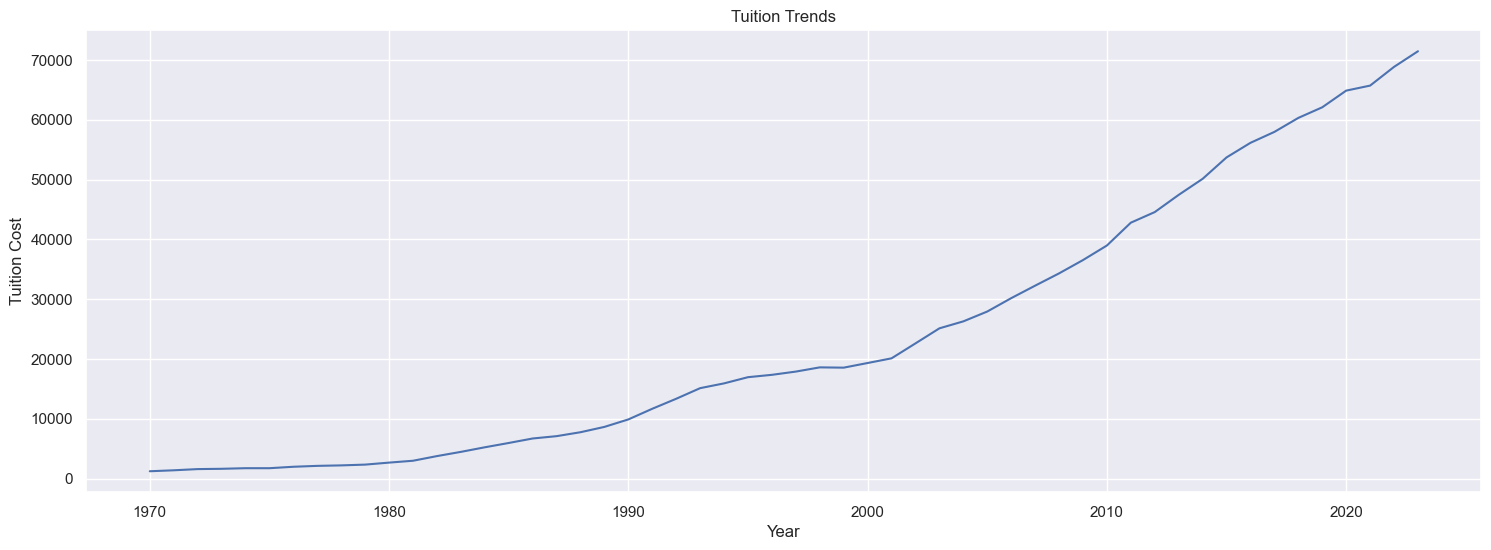

In [9]:
#creating lineplot of data to view how it would look in dashboard
plt.figure(figsize=(18, 6))
plt.plot(tuition['Year'], tuition['Tuition'])
plt.xlabel('Year')
plt.ylabel('Tuition Cost')
plt.title('Tuition Trends')
plt.show()


In [10]:
tuition.to_csv('processed_data/tuition.csv')

### GPA Distribution

In [11]:
gpa = pd.read_excel('precleaned_data/gpa_dist.xlsx')
gpa.head()

,Term Desc,Subject,Catalog Number,Class Title,Course ID,Primary Instructor Name,Class Section,Class Num,Class Academic Group,Course GPA,...,A+,A,A-,B+,B,B-,C+,C,C-,DFW
0,2025 January,AAS,2263,Swahili Cultures: Then & Now,47176,"Rotich,Anne J",501,10091,CGAS,4.000000,...,4,11,0,0,0,0,0,0,0,0
1,2025 January,ARCH,3500,Spec Topics in Architecture,1537,"Martin Robles,Ines Maria",501,10069,ARCH,3.614286,...,1,4,3,5,1,0,0,0,0,0
2,2025 January,ARH,3500,Topics inArchitectural History,1883,"Reilly,Lisa A",501,10067,ARCH,3.738462,...,0,3,9,1,0,0,0,0,0,0
3,2025 January,ARTH,3153,Prague: Threshold,47479,"Ramirez-Weaver,Eric Matthew",501,10150,CGAS,3.982353,...,4,12,1,0,0,0,0,0,0,0
4,2025 January,ARTH,3255,Renaissance Art on Site,2765,"Reilly,Lisa A",501,10066,CGAS,3.707143,...,0,3,9,2,0,0,0,0,0,0


In [12]:
gpa.shape
#26725 classes 

(26724, 21)

In [13]:
gpa.dtypes
#everything is the appropriate data type

Term Desc                   object
Subject                     object
Catalog Number               int64
Class Title                 object
Course ID                    int64
Primary Instructor Name     object
Class Section               object
Class Num                    int64
Class Academic Group        object
Course GPA                 float64
# of Students                int64
A+                           int64
A                            int64
A-                           int64
B+                           int64
B                            int64
B-                           int64
C+                           int64
C                            int64
C-                           int64
DFW                          int64
dtype: object

In [14]:
gpa[['Term Desc']].value_counts().shape
#21 different terms represented

(21,)

In [15]:
len(gpa['Class Title'].unique())
#4526 unique classes in dataset

4526

In [16]:
gpa[['Class Academic Group']].value_counts().shape
#13 different academic groups or colleges represented in dataset 
'''
CGAS - College of Arts and Sciences
ENGR - School of Engineering and Applied Sciences
EDUC - School of Education and Human Development
LAW - School of Law
COMM - McIntire School of Commerce 
SCPS - School of Continuing & Professional Studies
ARCH - School of Architecture
NURS - School of Nursing
LEAD - School of Leadership
MDS - Medical School 
DSCI - School of Data Science
MCDG - McIntire Darden Grad Business
PROV - Executive VP & Provost
''';

In [17]:
gpa = gpa.drop(columns=['Term Desc', 'Course ID', 'Primary Instructor Name', 'Class Section', 'Class Num'], axis=1)
gpa.columns
#dropping unneeded columns

Index(['Subject', 'Catalog Number', 'Class Title', 'Class Academic Group',
       'Course GPA', '# of Students', 'A+', 'A', 'A-', 'B+', 'B', 'B-', 'C+',
       'C', 'C-', 'DFW'],
      dtype='object')

In [18]:
class_grades = gpa[['Subject', 'Catalog Number', 'Class Title', 'Class Academic Group', 'A+', 'A', 'A-', 'B+', 'B', 'B-', 'C+', 'C', 'C-', 'DFW']]
course_gpa = gpa[['Subject', 'Catalog Number', 'Class Title', 'Class Academic Group', 'Course GPA']]
#separating datasets into class grade histograms and course gpa histograms

In [19]:
#conjoining 'Subject' and 'Catalog Number' for ease of processing
class_grades['Course Number'] = class_grades['Subject'] + ' ' +  class_grades['Catalog Number'].astype('str')
class_grades = class_grades.drop(columns=['Subject', 'Catalog Number', 'Class Title'], axis=1)

course_gpa['Course Number'] = course_gpa['Subject'] + ' ' + course_gpa['Catalog Number'].astype('str')
course_gpa = course_gpa.drop(columns=['Subject', 'Catalog Number', 'Class Title'], axis=1);

In [20]:
#aggregating grades for histogram
class_grades = class_grades.groupby('Course Number').aggregate('sum').drop(columns=['Class Academic Group'], axis=1)
class_grades.head()

,A+,A,A-,B+,B,B-,C+,C,C-,DFW
Course Number,,,,,,,,,,
AAS 1010,43,391,241,93,42,20,5,8,2,25
AAS 1020,141,455,120,48,23,4,4,5,1,5
AAS 2224,0,160,90,36,21,7,8,2,3,11
AAS 2263,6,22,0,0,0,0,0,0,0,0
AAS 2500,51,216,100,45,38,19,13,8,5,17


In [21]:
#resetting index column
class_grades = class_grades.reset_index()
class_grades.head()

,Course Number,A+,A,A-,B+,B,B-,C+,C,C-,DFW
0,AAS 1010,43,391,241,93,42,20,5,8,2,25
1,AAS 1020,141,455,120,48,23,4,4,5,1,5
2,AAS 2224,0,160,90,36,21,7,8,2,3,11
3,AAS 2263,6,22,0,0,0,0,0,0,0,0
4,AAS 2500,51,216,100,45,38,19,13,8,5,17


In [22]:
cs_2100 = class_grades[class_grades['Course Number'].values == 'CS 2100']
cs_2100
#isolating data structures and algorithms class


,Course Number,A+,A,A-,B+,B,B-,C+,C,C-,DFW
954,CS 2100,678,1249,423,265,218,117,52,38,26,80


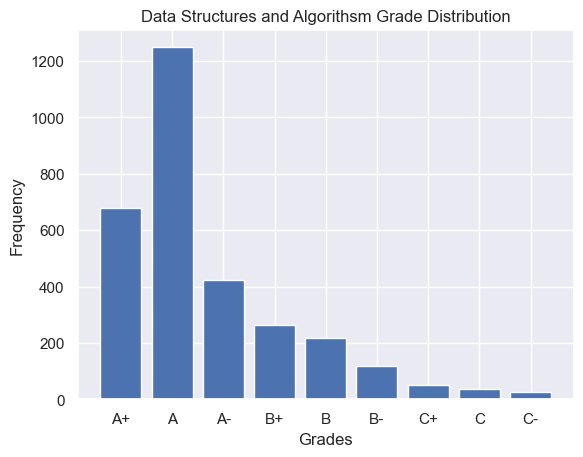

In [23]:
#creating example histogram
plt.bar(cs_2100.iloc[0][1:-1].index, cs_2100.iloc[0][1:-1].values)
plt.title('Data Structures and Algorithsm Grade Distribution')
plt.xlabel('Grades')
plt.ylabel('Frequency')
plt.show()

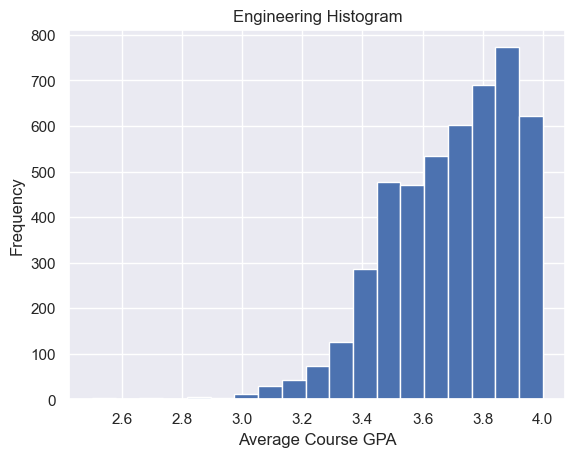

In [24]:
#creating example histogram of average course gpa distribution by school
engr_courses = course_gpa[course_gpa['Class Academic Group'] == 'ENGR'].drop(columns=['Class Academic Group'], axis=1).groupby('Course Number').aggregate('mean')
plt.hist(course_gpa.drop(columns=['Class Academic Group'], axis=1).groupby('Course Number').aggregate('mean'), bins=np.linspace(2.5, 4.0, 20))
plt.title('Engineering Histogram')
plt.xlabel('Average Course GPA')
plt.ylabel('Frequency')
plt.show()

In [25]:
course_gpa[course_gpa['Class Academic Group'] == 'ENGR'].drop(columns=['Class Academic Group'], axis=1).groupby('Course Number').aggregate('mean')

,Course GPA
Course Number,
APMA 1000,3.741567
APMA 1090,3.130864
APMA 1110,3.045889
APMA 2120,3.275034
APMA 2130,3.246941
...,...
SYS 6465,3.940000
SYS 6581,3.702329
SYS 6582,3.782208


In [26]:
course_gpa.head()

,Class Academic Group,Course GPA,Course Number
0,CGAS,4.000000,AAS 2263
1,ARCH,3.614286,ARCH 3500
2,ARCH,3.738462,ARH 3500
3,CGAS,3.982353,ARTH 3153
4,CGAS,3.707143,ARTH 3255


In [27]:
class_grades.head()

,Course Number,A+,A,A-,B+,B,B-,C+,C,C-,DFW
0,AAS 1010,43,391,241,93,42,20,5,8,2,25
1,AAS 1020,141,455,120,48,23,4,4,5,1,5
2,AAS 2224,0,160,90,36,21,7,8,2,3,11
3,AAS 2263,6,22,0,0,0,0,0,0,0,0
4,AAS 2500,51,216,100,45,38,19,13,8,5,17


In [28]:
class_grades.to_csv('processed_data/class_grades.csv')
course_gpa.to_csv('processed_data/course_gpa.csv')

### Demographic Percentages

In [29]:
genders = pd.read_excel('precleaned_data/gender_demo.xlsx')
generations = pd.read_excel('precleaned_data/generation_demo.xlsx')
loads = pd.read_excel('precleaned_data/load_demo.xlsx')
races = pd.read_excel('precleaned_data/race_demo.xlsx')
residencies = pd.read_excel('precleaned_data/residency_demo.xlsx')
schools = pd.read_excel('precleaned_data/school_demo.xlsx')
#importing required datasets

In [30]:
#removing irrelevant data
genders = genders.iloc[:2,:2]
generations = generations.iloc[:2,:2]
loads = loads.iloc[:2, :2]
races = races.drop(index=[6]).iloc[:,:-1]
residencies = residencies.iloc[:,:-1]
schools = schools.drop(index=[4, 15, 8, 10, 11, 12, 14]).iloc[:, :-1]


In [31]:
#exporting cleaned datasets
genders.to_csv('processed_data/genders.csv')
generations.to_csv('processed_data/generations.csv')
loads.to_csv('processed_data/loads.csv')
races.to_csv('processed_data/races.csv')
residencies.to_csv('processed_data/residencies.csv')
schools.to_csv('processed_data/schools.csv')